In [12]:
from __future__ import annotations
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

pd.options.display.float_format = "{:,.2f}".format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# load to dataframe
INFILE = '/home/grace/work/SEER/data/SEERPLUS_2010_2020.clean.tsv'
master = pd.read_csv(INFILE, header=0, sep='\t', na_values='.')

In [14]:
master.head()

,patient_id,patient_death_year,diagnosis_year,followup_year,diagnosis_agebin,cancer_type,cancer_group,primary_type,primary_group,t_stage_ajcc,n_stage_ajcc,g_stage_ajcc,t_stage_src,n_stage_src,g_stage_src,grade,grade_src,regional_nodes,regional_nodes_examined,regional_nodes_positive,behavior,num_malignant_tumors,num_benign_tumors,psa,breast_subtype,hist_type,hist_cateogry,brain_met,bone_met,lung_met,liver_met,other_met,distant_ln
0,108,NaN,2015,2020,75-79 years,Vulva,Vulva,Vulva,Vulva,Tis,N0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,BENIGN,2,0,NaN,NaN,8542,8500-8549: ductal and lobular neoplasms,False,False,False,False,NaN,NaN
1,137,"2,017.00",2012,2017,85-89 years,Myeloma,Leukemia,Myeloma,Leukemia,NaN,NaN,NaN,NaN,NaN,NaN,T_CELL,NaN,NaN,NaN,NaN,MALIGNANT,2,0,NaN,NaN,9732,9730-9739: plasma cell tumors,NaN,NaN,NaN,NaN,NaN,NaN
2,139,"2,011.00",2003,2011,60-64 years,NHL - Extranodal,Non-Hodgkin Lymphoma,Lung and Bronchus,Lung and Bronchus,NaN,NaN,NaN,NaN,NaN,NaN,T_CELL,NaN,NaN,NaN,NaN,MALIGNANT,3,0,NaN,NaN,9699,9670-9699: nhl - mature b-cell lymphomas,NaN,NaN,NaN,NaN,NaN,NaN
3,139,"2,011.00",2007,2011,65-69 years,Breast,Breast,Breast,Breast,Tis,N0,0,NaN,NaN,NaN,G3,NaN,NaN,0.00,NaN,BENIGN,3,0,NaN,NaN,8010,"8010-8049: epithelial neoplasms, NOS",NaN,NaN,NaN,NaN,NaN,NaN
4,139,"2,011.00",2010,2011,70-74 years,Breast,Breast,Breast,Breast,T3,N0,IIB,NaN,NaN,NaN,G3,NaN,NEG,3.00,0.00,MALIGNANT,3,0,NaN,HR-/HER2-,8500,8500-8549: ductal and lobular neoplasms,False,False,False,False,NaN,NaN


In [21]:

from util_funcs import do_basic_filtering
from util_funcs import remove_identical_primary_secondary_cases

print('\nFiltering')
df = do_basic_filtering(master)
df = remove_identical_primary_secondary_cases(df)

from util_funcs import do_basic_formatting
from util_funcs import format_regional_nodes_bins
from util_funcs import format_ln_status
from util_funcs import format_nstage_twolevel

HISTTYPES_PATH = '/home/grace/work/SEER/data/histology/histcodes.tsv'
print('\nFormatting')
df = do_basic_formatting(df, HISTTYPES_PATH)
df = format_regional_nodes_bins(df)
df = format_ln_status(df)
df = format_nstage_twolevel(df)
# remove Miscellaneous cancers. 
df = df[~(df['cancer_type']=='Miscellaneous')]

df.head()


Filtering
Removing records not in range (2010, 2020)
- removed 371509 records
Selecting records with MALIGNANT behavior
- removed 632160 records
Handling patients with multiple records of same cancer_type
- removed 82397 records

Final records: 4518517, patients: 4238366
Removing MET records where primary tissue is identical to secondary tissue
- removed 69806 records

Formatting
Missing 0 codes.
Formatting cancer subtypes
TNG, Grade standardisation
formatting regional nodes derived fields
formatting ln_status
Mapping NSTAGE field to two levels: N0, N1


,patient_id,patient_death_year,diagnosis_year,followup_year,diagnosis_agebin,cancer_type,cancer_group,primary_type,primary_group,t_stage_ajcc,n_stage_ajcc,g_stage_ajcc,t_stage_src,n_stage_src,g_stage_src,grade,grade_src,regional_nodes,regional_nodes_examined,regional_nodes_positive,behavior,num_malignant_tumors,num_benign_tumors,psa,breast_subtype,hist_type,hist_cateogry,brain_met,bone_met,lung_met,liver_met,other_met,distant_ln,any_met,hist_type_descr,TSTAGE_STD,NSTAGE_STD,GSTAGE_STD,GRADE_STD,regional_nodes_prop,regnodes_exam_bin,regnodes_pos_bin,regnodes_prop_bin,ln_status
4,139,"2,011.00",2010,2011,70-74 years,Breast,Breast,Breast,Breast,T3,N0,IIB,NaN,NaN,NaN,G3,NaN,NEG,3.00,0.00,MALIGNANT,3,0,NaN,HR-/HER2-,8500,ductal and lobular neoplasms,NO,NO,NO,NO,NaN,NaN,NO,Infiltrating duct carcinoma [+ others],T3,N0,II,G3,0.00,"(0, 10]","(0, 10]","(0.00, 0.25]",NaN
5,142,NaN,2018,2020,70-74 years,Breast,Breast,Breast,Breast,T2,N0,IIA,NaN,NaN,NaN,G3,P,NEG,3.00,0.00,MALIGNANT,2,0,NaN,HR-/HER2-,8500,ductal and lobular neoplasms,NO,NO,NO,NO,NO,False,NO,Infiltrating duct carcinoma [+ others],T2,N0,II,G3,0.00,"(0, 10]","(0, 10]","(0.00, 0.25]",negative
6,194,NaN,2016,2020,55-59 years,Ovary,Ovary,Ovary,Ovary,T1c,N0,IC,P,P,NaN,G2,NaN,NEG,10.00,0.00,MALIGNANT,2,0,NaN,NaN,8441,"cystic, mucinous and serous neoplasms",NO,NO,NO,NO,NO,False,NO,Serous carcinoma [+ others],T1,N0,I,G2,0.00,"(0, 10]","(0, 10]","(0.00, 0.25]",negative
7,220,NaN,2011,2020,70-74 years,Prostate,Prostate,Prostate,Prostate,T1c,N0,II,NaN,NaN,NaN,G2,NaN,NaN,0.00,NaN,MALIGNANT,2,0,6.60,NaN,8140,adenomas and adenocarcinomas,NO,NO,NO,NO,NaN,NaN,NO,Adenoma [+ others],T1,N0,II,G2,NaN,"(0, 10]",NaN,NaN,NaN
8,265,"2,016.00",2011,2016,65-69 years,Prostate,Prostate,Prostate,Prostate,T2c,N0,II,NaN,NaN,NaN,G3,NaN,NaN,0.00,NaN,MALIGNANT,2,0,7.70,NaN,8140,adenomas and adenocarcinomas,NO,NO,NO,NO,NaN,NaN,NO,Adenoma [+ others],T2,N0,II,G3,NaN,"(0, 10]",NaN,NaN,NaN


Features 
- TSTAGE
- NSTAGE
- GRADE
- TSTAGE:NSTAGE
- hist_cateogry
- ln_status

N-stage
- Anything with N-stage has to be broken into N0N1, N0N1N2 etc groups.
- ideally just want N0 vs N1. 
- this is inline with findings that N0->N1 shows largest change, much more noticible than N1->N2 etc. 
- ie having positive local LN is risk multiplier, but its more binary than linear trend. 
- some cancers eg pancreas, liver, ovary, bile dont show much difference N0->N1.

ln_status (?)
- neither
- local low ('regnodes_prop_bin' primarily then augment with Nstage if missing?)
- local high (as above)
- dist (why does this case exist???)
- local & dist


In [23]:
# define 'cancer_group'
from util_maps import CANCERTYPE_CANCERGROUP_MAP
df['cancer_group'] = df['cancer_type'].map(CANCERTYPE_CANCERGROUP_MAP, na_action='ignore')

In [24]:
# format the above
from util_maps import CGROUPS_NSTAGES_N0N1
from util_maps import CGROUPS_NSTAGES_N0N1N2
from util_maps import CGROUPS_NSTAGES_N0N1N2N3
COMPOUND_GROUP = 'compound_group'

# def _filter_nstage(df: pd.DataFrame) -> pd.DataFrame:
#     # remove tcell nstage
#     df = df[~(df['NSTAGE_STD']=='T_CELL')]

#     # for each n-staging group, remove odd records which violate
#     cgroup = df['cancer_group'].unique()[0]
#     if cgroup in CGROUPS_NSTAGES_N0N1:
#         valid_classes = ['N0', 'N1']
#     elif cgroup in CGROUPS_NSTAGES_N0N1N2:
#         valid_classes = ['N0', 'N1', 'N2']
#     elif cgroup in CGROUPS_NSTAGES_N0N1N2N3:
#         valid_classes = ['N0', 'N1', 'N2', 'N3']
#     else:
#         print(cgroup)
#         raise RuntimeError
    
#     df = df[df['NSTAGE_STD'].isin(valid_classes)]
#     return df 

def _format_compound_group(ffield: str, df: pd.DataFrame) -> pd.DataFrame:
    # eg compound t-stage & n-stage = 'TSTAGE_STD:NSTAGE_STD'
    df[ffield] = np.nan
    feat1, feat2 = ffield.split(':')
    mask = (df[feat1].notna()) & (df[feat2].notna())
    df.loc[mask, ffield] = df[mask][[feat1, feat2]].agg(':'.join, axis=1)
    return df


In [25]:
print(df.shape)
print()
print(df['brain_met'].value_counts(dropna=False))
print()
print(df['bone_met'].value_counts(dropna=False))
print()
print(df['lung_met'].value_counts(dropna=False))
print()
print(df['liver_met'].value_counts(dropna=False))
print()
print(df['other_met'].value_counts(dropna=False))
print()
print(df['distant_ln'].value_counts(dropna=False))
print()

(4027494, 44)

brain_met
NO     3640000
NaN     328304
YES      59190
Name: count, dtype: int64

bone_met
NO     3527295
NaN     325397
YES     174802
Name: count, dtype: int64

lung_met
NO     3583859
NaN     333193
YES     110442
Name: count, dtype: int64

liver_met
NO     3492030
NaN     323647
YES     211817
Name: count, dtype: int64

other_met
NaN    2251951
NO     1681581
YES      93962
Name: count, dtype: int64

distant_ln
NaN      2285883
False    1686638
True       54973
Name: count, dtype: int64



Calculating MI

In [40]:
# mutual information 
from sklearn.metrics import adjusted_mutual_info_score
from util_maps import NSTAGE_IGNORES
from typing import Optional, Tuple
from copy import deepcopy
from collections import defaultdict

RESPONSES = ['brain_met', 'bone_met', 'lung_met', 'liver_met', 'other_met']
GROUP = 'cancer_group'
GROUP_IGNORES = {
    'brain_met': ['Brain'],
    'bone_met': ['Bones and Joints'],
    'lung_met': ['Lung and Bronchus'],
    'liver_met': ['Liver'],
    'other_met': []
}

FEATURES = [
    'TSTAGE_STD',
    'NSTAGE_STD',
    'GRADE_STD',
    'hist_cateogry',
    'hist_type_descr',
    'distant_ln',
    'ln_status',
]



In [28]:

def _filter_for_mutually_exclusive_categories(df: pd.DataFrame, response: str) -> pd.DataFrame:
    """aims to capture which features are important in determine brain metastasis rather than other secondary sites"""
    
    # YES = only this met (eg brain), no other mets
    this_met_df = df[df[response]=='YES']
    for res in RESPONSES:
        if res == response:
            continue
        this_met_df = this_met_df[this_met_df[res]=='NO']
    print('\nthis met df:')
    print(this_met_df.shape)
    print(this_met_df[['cancer_group'] + RESPONSES].head())

    # NO  = not this met, but positive for other mets 
    other_met_df = df[df[response]=='NO']
    other_met_df = other_met_df[other_met_df['any_met']=='YES']
    print('\nother met df:')
    print(other_met_df.shape)
    print(other_met_df[['cancer_group'] + RESPONSES].head())

    table = pd.concat([this_met_df, other_met_df], ignore_index=True)
    print('\ntable:')
    print(table[response].value_counts(dropna=False))
    return table

def _get_valid_values(df: pd.DataFrame, response: str, exclusive: bool=False) -> Tuple[list, dict]:
    # we want to keep as many groups as possible for brain_met for plotting.
    # the others (bone, lung, liver) appear to the side, but are only here for comparison. 
    MIN_GROUP_RECORDS = 2000
    MIN_GROUP_POSITIVE = 20
    OK_FCLASS_RECORDS_THRESH = 1000
    OK_FCLASS_POSITIVE_THRESH = 20
    
    valid_groups = set()
    valid_features = dict()

    # filter records based on response
    # irows = df.shape[0]
    if exclusive:
        filt = _filter_for_mutually_exclusive_categories(df, response)
    else:
        filt = df.dropna(subset=[response])
    # print(f'Dropped {irows - filt.shape[0]} rows')
    # print(f'Original group count: {len(filt[GROUP].unique())}')

    # GROUP FILTERING: TOTAL RECORDS, POSITIVE RECORDS
    mask1 = filt[GROUP].value_counts() >= MIN_GROUP_RECORDS
    mask2 = filt.groupby([GROUP, response]).size().unstack()['YES'] >= MIN_GROUP_POSITIVE
    mask = mask1 & mask2
    valid_groups = set(mask.loc[mask==True].index.to_list())

    # FEATURE FILTERING: identifying valid histological classes.
    # 'OK CLASS' defined as either >= thresh records, or >= thresh positive.
    for feature in FEATURES:
        # if 'hist' not in feature:
        #     continue 
        counts = filt.groupby([GROUP, feature, response]).size().unstack()
        counts = counts.fillna(value=0)
        counts['NO'] = counts['NO'].apply(int)
        counts['YES'] = counts['YES'].apply(int)
        counts['TOTAL'] = counts['NO'] + counts['YES']
        counts['OK_RECORDS'] = counts['TOTAL'] >= OK_FCLASS_RECORDS_THRESH
        counts['OK_POSITIVE'] = counts['YES'] >= OK_FCLASS_POSITIVE_THRESH
        counts['OK_CLASS'] = counts['OK_RECORDS'] | counts['OK_POSITIVE']

        # print(counts.head(20))
        # print()

        # dataframe to dict
        counts = counts.reset_index()
        for i, row in counts.iterrows():
            if row['OK_CLASS'] == True:
                fval = row[feature]
                gval = row[GROUP]
                if feature not in valid_features:
                    valid_features[feature] = defaultdict(list)
                valid_features[feature][gval].append(fval)
        
        # print(feature)
        # for k, v in valid_features[feature].items():
        #     print(f'{k}:\t{v}')

    # print(f'\nStarting groups ({len(valid_groups)}):')
    # for g in valid_groups:
    #     print(g)

    # GROUP FILTERING: EACH FEATURE HAS 2 OK CLASSES (from the above)
    for feature in FEATURES:
        # if 'hist' not in feature:
        #     continue
        vgroups = set([k for k, v in valid_features[feature].items() if len(v) >= 2])
        
        # print(f'\n{feature}')
        # print(f'Removing {len(remove_groups)} groups:')
        # remove_groups = valid_groups - vgroups
        # for g in remove_groups:
        #     print(g)
        
        valid_groups = valid_groups & vgroups
            
    # print(f'\nFinal groups ({len(valid_groups)}):')
    # for g in valid_groups:
    #     print(g)

    # tidy up valid features.
    # only want to define valid values for hist types. 
    tidy_valid_features = {}
    for feat in valid_features.keys():
        if 'hist' in feat:
            tidy_valid_features[feat] = {k: v for k, v in valid_features[feat].items() if k in valid_groups and len(v) >= 2}

    # return 
    return sorted(list(valid_groups)), tidy_valid_features
    

def filter_invalid_records(df: pd.DataFrame, valid_groups: list[str], valid_features: dict) -> pd.DataFrame:

    # valid groups
    print('\nfiltering invalid groups')
    print(f'initial records: {df.shape}')
    valid_groups_set = set(valid_groups)
    df = df[df[GROUP].isin(valid_groups_set)]
    print(f'final records: {df.shape}')

    PRINTFIELDS = [GROUP] + FEATURES + RESPONSES + ['any_met', 'distant_ln']
    # valid features
    print('\nfiltering invalid group+feature combinations')
    print(f'initial records: {df.shape}')
    for i, group in enumerate(valid_groups):
        print(f'processed {i}/{len(valid_groups)} groups.', end='\r')
        for ffield in FEATURES:
            if ffield not in valid_features:
                continue
            ok_features = valid_features[ffield][group]
            mask = (df[GROUP]==group) & ~(df[ffield].isin(ok_features))
            # print(f'\ngroup: {group}')
            # print(f'feature: {ffield}')
            # print(f'valid values: {ok_features}')
            # print('\nOK ---')
            # print(df[~mask].shape)
            # print(df[~mask][PRINTFIELDS].head())
            # print('\nNOT OK ---')
            # print(df[mask].shape)
            # print(df[mask][PRINTFIELDS].head())
            # raise NotImplementedError
            df = df[~mask]
    print(f'final records: {df.shape}')
    return df


In [33]:

def calc_mutual_information(ftable: pd.DataFrame, rfield: str, exclusive: bool=False) -> pd.DataFrame:
    ### FILTERING ###
    if exclusive:
        ftable = _filter_for_mutually_exclusive_categories(ftable, rfield)
    ### /FILTERING ###
    
    # # printing counts
    # for ffield in FEATURES:
    #     print()
    #     print(ftable.groupby([GROUP, ffield, rfield]).size().unstack().head(20))
    
    groupvals = ftable[GROUP].unique()
    scores_df = pd.DataFrame(index=groupvals, columns=FEATURES, dtype=float)

    for group in groupvals:
        print(group)
        for ffield in FEATURES:
            # ignore conditions for this group
            if group in GROUP_IGNORES[rfield]:
                print('STMT 1')
                continue 
            # ignore conditions for this feature
            if ffield == 'NSTAGE_STD' and group in NSTAGE_IGNORES:
                print('STMT 2')
                continue
            
            ### FILTERING ###
            gftable = ftable[ftable[GROUP]==group][[ffield, rfield]]
            gftable = gftable.dropna()
            ### /FILTERING ###
            
            # # filtering / formatting
            # if ffield == 'NSTAGE_STD':
            #     filt = _filter_nstage(filt)
                    
            # ### counts ###
            # # get counts
            # c_matrix = filt.groupby([ffield, rfield]).size().unstack(fill_value=0)
            # if 'YES' not in c_matrix:
            #     c_matrix['YES'] = 0
            # if 'NO' not in c_matrix:
            #     c_matrix['NO'] = 0
            # c_matrix = c_matrix.reset_index()
            # c_matrix[GROUP] = group
            # c_matrix['feature'] = ffield 
            # c_matrix['value'] = c_matrix[ffield]

            ### MI score ###
            score = adjusted_mutual_info_score(labels_pred=gftable[ffield], labels_true=gftable[rfield])
            scores_df.loc[group, ffield] = float(score)

    return scores_df


In [41]:

score_tables = []
count_tables = []
maintable = deepcopy(df)

# compound group if required
if ':' in GROUP:
    print('creating compound group: {GROUP}')
    gfields = GROUP.split(':')
    maintable[GROUP] = maintable[gfields].agg(':'.join, axis=1)

# subset years if using these features
if 'ln_status' in FEATURES or 'distant_ln' in FEATURES or 'other_met' in RESPONSES:
    print('subsetting to years 2016+')
    maintable = maintable[maintable['diagnosis_year'] >= 2016]

### identify valid group/feature values (using brain met) ###
print('identifying valid group/feature values')
groupvals, featurevals = _get_valid_values(maintable, response='brain_met', exclusive=False)

# print('\nvalid groups')
# for g in groupvals:
#     print(g)
# print()
# print('\nvalid features')
# print(pd.DataFrame.from_dict(featurevals))

### FILTERING ###
ftable = filter_invalid_records(
    maintable,
    valid_groups=groupvals, 
    valid_features=featurevals, 
)
### /FILTERING ###


subsetting to years 2016+
identifying valid group/feature values

filtering invalid groups
initial records: (1940154, 44)
final records: (1405920, 44)

filtering invalid group+feature combinations
initial records: (1405920, 44)
final records: (1343703, 44)


In [42]:
print(len(groupvals))
for g in groupvals:
    print(g)

print()
for feat, the_dict in featurevals.items():
    print()
    print(feat)
    for k, v in the_dict.items():
        print(k, v)

13
Breast
Cervix
Colorectal
Corpus Uteri (carcinoma)
Esophagus
Kidney and Renal Pelvis
Lung and Bronchus
Oral
Ovary
Pancreas
Prostate
Stomach
Urinary Bladder


hist_cateogry
Breast ['adenomas and adenocarcinomas', 'complex epithelial neoplasms', 'cystic, mucinous and serous neoplasms', 'ductal and lobular neoplasms', 'epithelial neoplasms, NOS', 'unspecified neoplasms']
Cervix ['adenomas and adenocarcinomas', 'squamous cell neoplasms']
Colorectal ['adenomas and adenocarcinomas', 'cystic, mucinous and serous neoplasms', 'epithelial neoplasms, NOS', 'squamous cell neoplasms', 'unspecified neoplasms']
Corpus Uteri (carcinoma) ['adenomas and adenocarcinomas', 'complex epithelial neoplasms', 'complex mixed and stromal neoplasms', 'cystic, mucinous and serous neoplasms']
Esophagus ['adenomas and adenocarcinomas', 'squamous cell neoplasms']
Kidney and Renal Pelvis ['adenomas and adenocarcinomas', 'epithelial neoplasms, NOS', 'transitional cell papillomas and carcinomas']
Lung and Bronchus ['a

In [43]:
### iterate mets ###
for rfield in RESPONSES:
    print(f'\n\n{rfield.upper()} ---')
    scores = calc_mutual_information(ftable, rfield=rfield, exclusive=False)
    score_tables.append(scores)



BRAIN_MET ---
Breast
Ovary
Corpus Uteri (carcinoma)
Lung and Bronchus
Oral
Kidney and Renal Pelvis
Urinary Bladder
Prostate
Pancreas
Colorectal
Esophagus
Stomach
Cervix


BONE_MET ---
Breast
Ovary
Corpus Uteri (carcinoma)
Lung and Bronchus
Oral
Kidney and Renal Pelvis
Urinary Bladder
Prostate
Pancreas
Colorectal
Esophagus
Stomach
Cervix


LUNG_MET ---
Breast
Ovary
Corpus Uteri (carcinoma)
Lung and Bronchus
STMT 1
STMT 1
STMT 1
STMT 1
STMT 1
STMT 1
STMT 1
Oral
Kidney and Renal Pelvis
Urinary Bladder
Prostate
Pancreas
Colorectal
Esophagus
Stomach
Cervix


LIVER_MET ---
Breast
Ovary
Corpus Uteri (carcinoma)
Lung and Bronchus
Oral
Kidney and Renal Pelvis
Urinary Bladder
Prostate
Pancreas
Colorectal
Esophagus
Stomach
Cervix


OTHER_MET ---
Breast
Ovary
Corpus Uteri (carcinoma)
Lung and Bronchus
Oral
Kidney and Renal Pelvis
Urinary Bladder
Prostate
Pancreas
Colorectal
Esophagus
Stomach
Cervix


In [38]:
### plotting ###

import matplotlib
from typing import Optional

def plot_matrix(responses: list[str], score_tables: list[pd.DataFrame], name: str, standard_scale: Optional[str]=None) -> None:
    CLUSTER_FEATURES = False
    CLUSTER_GROUPS = True
    assert len(responses) == len(score_tables)

    def _standard_scale(table: pd.DataFrame, axis: str='rows') -> pd.DataFrame:
        # Normalize these values to range from 0 to 1
        assert axis in ['rows', 'cols']
        # transform
        if axis == 'cols':
            std = table
        else:
            std = table.T
        # do scaling
        subtract = std.min()
        std = (std - subtract) / (
            std.max() - std.min())
        # transform
        if axis == 'cols':
            return std
        else:
            return std.T
        
    # determine clustering
    table = deepcopy(score_tables[0])
    table[table.isna()] = 0
    table.loc[(table == 0).all(axis=1), 'TSTAGE_STD'] = 0.000001
    cm = sns.clustermap(
        table, 
        row_cluster=CLUSTER_GROUPS, 
        col_cluster=CLUSTER_FEATURES, 
        metric="euclidean",
        square=True,
        standard_scale=0,
        vmax=4,
        cmap=matplotlib.cm.Spectral_r,
        figsize=(2, 2),
    )
    plt.show()
    plt.close()
    
    # get order of clustered rows / cols
    rowinds = cm.dendrogram_row.reordered_ind if CLUSTER_GROUPS else list(range(table.shape[0]))
    colinds = cm.dendrogram_col.reordered_ind if CLUSTER_FEATURES else list(range(table.shape[1]))
    rowlabels = [table.index[idx] for idx in rowinds]
    collabels = [table.columns[idx] for idx in colinds]

    # reorder table rows/cols using new ordering
    score_tables = [t[collabels] for t in score_tables]
    score_tables = [t.loc[rowlabels] for t in score_tables]

    ntables = len(score_tables)
    fig, axes = plt.subplots(nrows=1, ncols=ntables, figsize=(ntables * 3, 6))
    
    for i, (res, master, ax) in enumerate(zip(responses, score_tables, axes.flat)):
        ax.set_facecolor("black")
        table = deepcopy(master)
        mask = table.isna()
        table[table.isna()] = 0
        table.loc[(table == 0).all(axis=1), 'TSTAGE_STD'] = 0.000001
        if standard_scale is not None:
            table_std = _standard_scale(table, standard_scale)
            hm = sns.heatmap(
                table_std, 
                vmax=4,
                cmap=matplotlib.cm.Spectral_r,
                cbar=False,
                mask=mask,
                ax=ax
            )
        else:
            hm = sns.heatmap(
                table, 
                cmap=matplotlib.cm.Spectral_r,
                cbar=False,
                mask=mask,
                ax=ax
            )
        for y, rlabel in enumerate(rowlabels): 
            for x, clabel in enumerate(collabels):
                if mask.loc[rlabel, clabel]:
                    ax.text(x+0.5, y+0.5, 'x', va="center", ha="center", color='white', fontsize='small')
        ax.set_title(res)
        if i > 0:
            ax.set_yticks([])

    plt.savefig(f'/home/grace/work/SEER/outputs/mutual_information/{name}.png', bbox_inches="tight")
    plt.show()


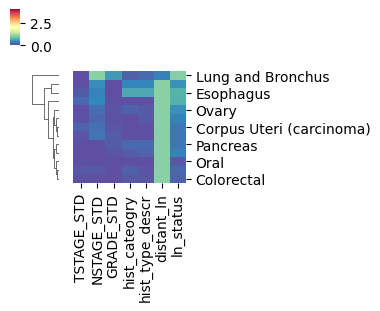

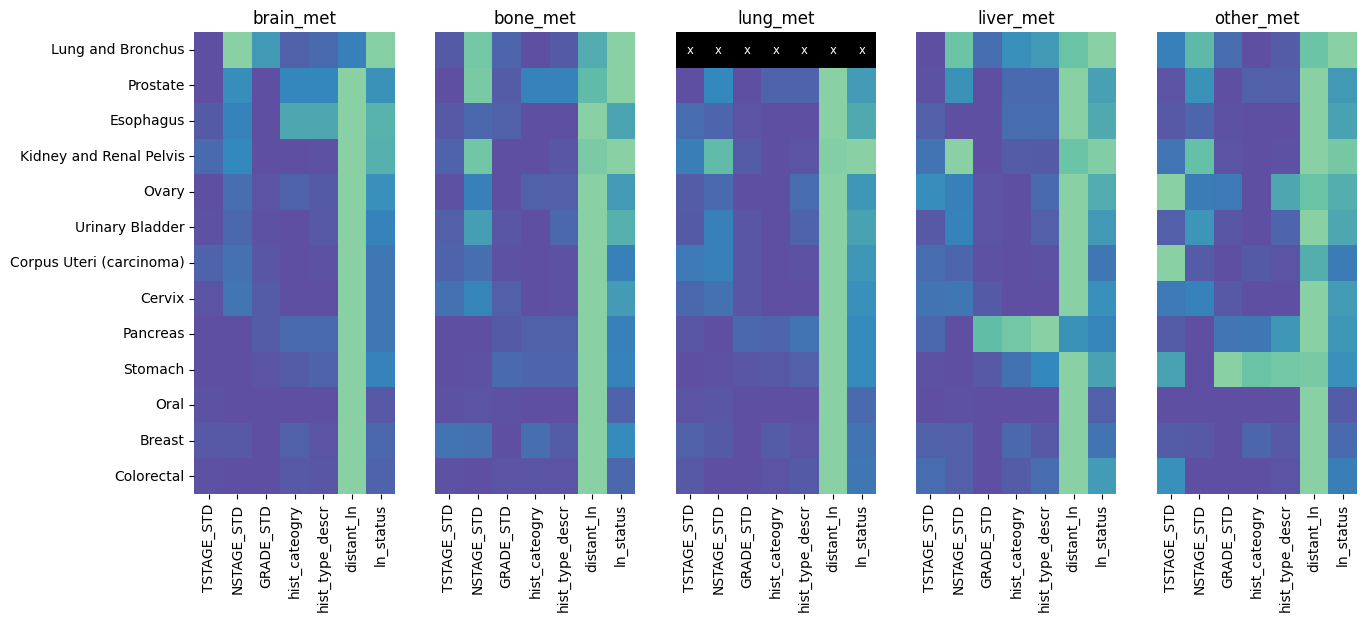

In [44]:
plot_matrix(RESPONSES, score_tables, standard_scale='rows', name='simple_stdrows')
# plot_matrix(RESPONSES, score_tables, standard_scale='rows', name='simple_noLN_stdrows')

In [ ]:

def do_mutual_information(df: pd.DataFrame, exclusive: bool=False) -> list[pd.DataFrame]:
    score_tables = []
    count_tables = []
    maintable = deepcopy(df)
    
    # compound group if required
    if ':' in GROUP:
        print('creating compound group: {GROUP}')
        gfields = GROUP.split(':')
        maintable[GROUP] = maintable[gfields].agg(':'.join, axis=1)

    # subset years if using these features
    if 'ln_status' in FEATURES or 'distant_ln' in FEATURES:
        print('subsetting to years 2016+')
        maintable = maintable[maintable['diagnosis_year'] >= 2016]

    ### identify valid group/feature values (using brain met) ###
    print('identifying valid group/feature values')
    groupvals, featurevals = _get_valid_values(maintable, response='brain_met', exclusive=exclusive)
    
    # print('\nvalid groups')
    # for g in groupvals:
    #     print(g)
    # print()
    # print('\nvalid features')
    # print(pd.DataFrame.from_dict(featurevals))

    ### FILTERING ###
    ftable = filter_invalid_records(
        maintable, 
        valid_groups=groupvals, 
        valid_features=featurevals, 
    )
    ### /FILTERING ###

    ### iterate mets ###
    for rfield in RESPONSES:
        print(f'\n\n{rfield.upper()} ---')
        scores = calc_mutual_information(ftable, rfield=rfield, exclusive=exclusive)
        score_tables.append(scores)

    return score_tables

FEATURES = [
    'TSTAGE_STD',
    'NSTAGE_STD',
    'GRADE_STD',
    'hist_cateogry',
    'hist_type_descr',
    # 'distant_ln',
    # 'ln_status',
]

mi_tables_simple_noLN = do_mutual_information(df)
# mi_tables_exclusive_noLN = do_mutual_information(df, exclusive=True)

# FEATURES = [
#     'TSTAGE_STD',
#     'NSTAGE_STD',
#     'GRADE_STD',
#     'hist_cateogry',
#     'hist_type_descr',
#     'distant_ln',
#     'ln_status',
# ]

# mi_tables_simple = do_mutual_information(df)
# mi_tables_exclusive = do_mutual_information(df, exclusive=True)

print(df.shape)


In [ ]:
print(df.shape)
print(df[(df['cancer_group']=='Anus, Anal Canal and Anorectum') & (df['TSTAGE_STD']=='T1')]['brain_met'].value_counts(dropna=False))

In [ ]:

for tables in [mi_tables_simple_noLN, mi_tables_exclusive_noLN, mi_tables_simple, mi_tables_exclusive]:
    for i, table in enumerate(tables):
        table[table < 0] = 0
        tables[i] = table.drop('Miscellaneous', axis=0, errors='ignore')

plot_matrix(RESPONSES, mi_tables_simple_noLN, name='simple_noLN_raw')
plot_matrix(RESPONSES, mi_tables_exclusive_noLN, name='exclusive_noLN_raw')
plot_matrix(RESPONSES, mi_tables_simple_noLN, standard_scale='rows', name='simple_noLN_stdrows')
plot_matrix(RESPONSES, mi_tables_exclusive_noLN, standard_scale='rows', name='exclusive_noLN_stdrows')

plot_matrix(RESPONSES, mi_tables_simple, name='simple_raw')
plot_matrix(RESPONSES, mi_tables_exclusive, name='exclusive_raw')
plot_matrix(RESPONSES, mi_tables_simple, standard_scale='rows', name='simple_stdrows')
plot_matrix(RESPONSES, mi_tables_exclusive, standard_scale='rows', name='exclusive_stdrows')

In [ ]:
import itertools
from util_funcs import calculate_feature_stats
from util_classes import Settings

sns.set_theme()

# single table 
counts_master = pd.DataFrame(columns=['response', 'cancer_group', 'feature', 'value', 'YES', 'NO'])
for res, ctable in zip(RESPONSES, count_tables):
    ctable['response'] = res
    counts_master = pd.concat([counts_master, ctable], axis=0, ignore_index=True)


fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(16, 8), sharex='col', constrained_layout=True)
# fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20, 8))

CANCER_GROUP = 'Prostate'
COLORS = ['blue', 'hotpink', 'green', 'orange']
# FEATURES = ['TSTAGE_STD', 'NSTAGE_STD', 'GRADE_STD', 'hist_cateogry', 'hist_type_descr', 'ln_status']
FEATURES = ['TSTAGE_STD', 'NSTAGE_STD', 'GRADE_STD', 'ln_status', 'hist_type_descr']
RESPONSES = ['brain_met', 'bone_met', 'lung_met', 'liver_met']
# # logodds
# odds_table = pd.DataFrame(index=table.index, columns=[s.OR_STAT, s.OR_CI_LOW, s.OR_CI_HIGH])
# for fval in table.index.to_list():
#     cmatrix = pd.DataFrame(columns=['subset', 'reference'], index=['YES', 'NO'], data=[[0, 0],[0, 0]])
#     cmatrix.loc['YES', 'reference'] = cohort_yes
#     cmatrix.loc['YES', 'subset'] = table.loc[fval, 'YES']
#     cmatrix.loc['NO', 'reference'] = cohort_no
#     cmatrix.loc['NO', 'subset'] = table.loc[fval, 'NO']
#     res = odds_ratio(cmatrix, kind='sample')
#     ci = res.confidence_interval(confidence_level=0.95)
#     or_stat = np.nan if res.statistic == 0 or res.statistic == np.nan else math.log(res.statistic)
#     ci_low = np.nan if ci.low == 0 or ci.low == np.nan else math.log(ci.low)
#     ci_high = np.nan if ci.high == 0 or ci.high == np.nan else math.log(ci.high)
#     odds_table.loc[fval] = pd.Series({s.OR_STAT: or_stat, s.OR_CI_LOW: ci_low, s.OR_CI_HIGH: ci_high})

# cohort_yes = df[df['cancer_group']][]

"""
                          Acinar cell tumor [+ others]     0     170
                    Adenocarcinoma with mixed subtypes     1      53
                                    Adenoma [+ others]    16  129306
                                  Carcinoma [+ others]     0      90
                Infiltrating duct carcinoma [+ others]     0     339
                           Mucinous adenoma [+ others]     0      79
                                              Neoplasm     0      71
                                  Small cell carcinoma     3      27
"""

VALID_HIST_TYPES = [
    'Acinar cell tumor [+ others]',
    'Adenocarcinoma with mixed subtypes',
    'Adenoma [+ others]',
    'Carcinoma [+ others]',
    'Infiltrating duct carcinoma [+ others]',
    'Mucinous adenoma [+ others]',
    'Neoplasm',
    'Small cell carcinoma',
]

pmaster = df[df['cancer_group']==CANCER_GROUP]
pmaster = pmaster[pmaster['GRADE_STD']!='T_CELL']
pcounts = counts_master[counts_master['cancer_group']==CANCER_GROUP]
i = -1 
for i, feature in enumerate(FEATURES):
    for j, (color, response) in enumerate(zip(COLORS, RESPONSES)):
        ax = axes[j, i]
        table = calculate_feature_stats(feature, response, pmaster, Settings())
        # print()
        # print(feature, response)
        # print(table)

        if feature == 'hist_type_descr':
            table = table.loc[VALID_HIST_TYPES]
            print()
            print(response)
            print(table)

        nrows = table.shape[0]
        ax.set_ylim(0, nrows + 1)
        ax.set_yticks(list(range(1, nrows + 1)))
        ax.set_yticklabels(table.index.to_list())
        # ax.set_xticks([])
        
        k = 1
        ax.axvline(0, c='grey', ls='--')
        for _, row in table.iterrows():
            ax.hlines(y=k, xmin=row['OR_CI_LOW'], xmax=row['OR_CI_HIGH'], colors=color)
            ax.scatter(row["OR_STAT"], k, marker='o', c=color)
            k += 1

# plt.tight_layout()
#     the_axes.set_title(response)
# ax4.set_xticks([0, 5, 10, 15, 20, 25])
# ax4.set_xticklabels(['1', '5', '10', '15', '20', '25'])
# ax4.set_xlabel('Odds ratio')
# plt.show()

In [ ]:
import itertools

colors = ['blue', 'hotpink', 'green', 'orange']
features = ['TSTAGE_STD', 'NSTAGE_STD', 'GRADE_STD', 'hist_cateogry', 'hist_type_descr', 'ln_status']
for (c, r), f in list(itertools.product(zip(colors, RESPONSES), features)):
    print(r, c, f)


In [ ]:
counts_master = pd.DataFrame(columns=['response', 'cancer_group', 'feature', 'value', 'YES', 'NO'])
for res, ctable in zip(RESPONSES, count_tables):
    ctable['response'] = res
    counts_master = pd.concat([counts_master, ctable], axis=0, ignore_index=True)

print(counts_master[(counts_master['cancer_group']=='Prostate') & (counts_master['feature']=='NSTAGE_STD')])
print()
print(counts_master[(counts_master['cancer_group']=='Prostate') & (counts_master['feature']=='hist_type_descr')])
print()
print(counts_master[(counts_master['cancer_group']=='Prostate') & (counts_master['feature']=='ln_status')])
print()

In [ ]:
counts_master = pd.DataFrame(columns=['response', 'cancer_group', 'feature', 'value', 'YES', 'NO'])
for res, ctable in zip(RESPONSES, count_tables):
    ctable['response'] = res
    counts_master = pd.concat([counts_master, ctable], axis=0, ignore_index=True)

print(counts_master[(counts_master['cancer_group']=='Prostate') & (counts_master['feature']=='NSTAGE_STD')])
print()
print(counts_master[(counts_master['cancer_group']=='Prostate') & (counts_master['feature']=='hist_type_descr')])
print()
print(counts_master[(counts_master['cancer_group']=='Prostate') & (counts_master['feature']=='ln_status')])
print()

<br>
<br>
<br>

In [ ]:
# mutual information 
from sklearn.metrics import normalized_mutual_info_score, adjusted_mutual_info_score
from util_maps import NSTAGE_IGNORES

GROUP_FIELD = 'cancer_group'
GROUPS = sorted(list(df[GROUP_FIELD].unique()))
FEATURES = [
    'TSTAGE_STD:NSTAGE_STD',
    'TSTAGE_STD',
    'NSTAGE_STD',
    'GRADE_STD',
    'hist_cateogry',
    'hist_type_descr',
    'ln_status',
]
RESPONSE = 'brain_met'
THRESH_GROUP_RECORDS = 1000
THRESH_FEATURE_RECORDS = 10

# how does MI do when only 2 states in predictor? what about 10? how is this balanced. 
mi_normscores_df = pd.DataFrame(index=GROUPS, columns=FEATURES, dtype=float)
mi_adjscores_df = pd.DataFrame(index=GROUPS, columns=FEATURES, dtype=float)
mi_counts_df = pd.DataFrame()

for i, group in enumerate(GROUPS):
    single_features = [x for x in FEATURES if ':' not in x]
    group_df = df[df[GROUP_FIELD]==group][[GROUP_FIELD] + single_features + [RESPONSE]]
    group_df = group_df.dropna()
    if group_df.shape[0] < THRESH_GROUP_RECORDS:
        print(f'{group}... skipped (group records thresh)')
        continue
    for ffield in FEATURES:
        # print()
        # print()
        # print(ffield)
        # print(f'{i}/{len(GROUPS)} subsets calculated', end='\r')
        # print()
        # print(group)
        
        # if ':' in ffield:
        #     keepfields = ffield.split(':') + [RESPONSE]
        # else:
        #     keepfields = [ffield] + [RESPONSE]

        # temp = df[df[GROUP_FIELD]==group][[GROUP_FIELD] + keepfields]
        # temp = temp[[GROUP_FIELD] + keepfields]
        # temp = temp.dropna(subset=keepfields)

        # early exit before filtering / formatting
        if group == 'Brain':
            # print('(ignored)')
            continue
        if 'NSTAGE_STD' in ffield and group in NSTAGE_IGNORES:
            # print('(ignored)')
            continue 
        
        # if temp.shape[0] < THRESH_GROUP_RECORDS:
        #     print(f'{group}... skipped (group records thresh)')
        #     continue

        # filtering / formatting
        if 'NSTAGE_STD' in ffield:
            group_df = _filter_nstage(group_df)
        if ':' in ffield:
            group_df = _format_compound_group(ffield, group_df)
                
        ### counts ###
        # get counts
        c_matrix = group_df.groupby([ffield, RESPONSE]).size().unstack(fill_value=0)
        if 'YES' not in c_matrix:
            c_matrix['YES'] = 0
        if 'NO' not in c_matrix:
            c_matrix['NO'] = 0
        c_matrix = c_matrix.reset_index()
        c_matrix['cancer_group'] = group
        c_matrix['feature'] = ffield 
        c_matrix['value'] = c_matrix[ffield]
        
        # identify feature values with too few records & remove
        if ffield == 'TSTAGE_STD:NSTAGE_STD' or 'hist' in ffield:
            # find low counts
            ignore_fvalues = []
            for i, row in c_matrix.iterrows():
                if row['YES'] + row['NO'] < THRESH_FEATURE_RECORDS and row['YES'] < 5:
                    ignore_fvalues.append(row['value'])

            # update counts matrix 
            if ignore_fvalues:
                c_matrix = c_matrix[~c_matrix['value'].isin(ignore_fvalues)]

            # update dataframe for mi score calculation
            group_df = group_df[~group_df[ffield].isin(ignore_fvalues)]

        # # late exit after filtering / formatting
        # if temp.shape[0] < THRESH_GROUP_RECORDS:
        #     print(f'{group}... skipped (group records thresh)')
        #     continue
        mi_counts_df = pd.concat([mi_counts_df, c_matrix[['cancer_group', 'feature', 'value', 'YES', 'NO']]], axis=0)

        ### MI score ###
        norm_score = normalized_mutual_info_score(labels_pred=group_df[ffield], labels_true=group_df[RESPONSE])
        adj_score = adjusted_mutual_info_score(labels_pred=group_df[ffield], labels_true=group_df[RESPONSE])
        mi_normscores_df.loc[group, ffield] = float(norm_score)
        mi_adjscores_df.loc[group, ffield] = float(adj_score)



In [ ]:
# mi_counts_df.sort_values(by='TSTAGE_STD', ascending=False)
import matplotlib

def plot_matrix(df: pd.DataFrame, suffix: str='') -> None:
    # IGNORE_GROUPS = ['Penis', 'Vulva']
    # df = df.drop(IGNORE_GROUPS, axis=0)
    suffix_fmt = f'_{suffix}' if suffix else ''
    
    # cm = sns.clustermap(
    #     df, 
    #     col_cluster=False, 
    #     row_cluster=True, 
    #     metric="euclidean",
    #     square=True,
    #     cmap=matplotlib.cm.Spectral_r,
    #     figsize=(5, 14),
    #     vmax=0.025,
    # )
    # plt.savefig(f'/home/grace/work/SEER/outputs/misc/mutual_information_clustmap_raw{suffix_fmt}.png', bbox_inches="tight")
    # plt.show()

    cm = sns.clustermap(
        df, 
        col_cluster=False, 
        row_cluster=True, 
        metric="euclidean",
        square=True,
        standard_scale=0,
        vmax=4,
        cmap=matplotlib.cm.Spectral_r,
        figsize=(5.5, 14),
    )
    plt.savefig(f'/home/grace/work/SEER/outputs/misc/mutual_information_clustmap_ss{suffix_fmt}.png', bbox_inches="tight")
    plt.show()


### filtering ###
mi_counts_filt = deepcopy(mi_counts_df)
yes_df = mi_counts_filt.groupby(['cancer_group', 'feature'])['YES'].sum().unstack()
no_df = mi_counts_filt.groupby(['cancer_group', 'feature'])['NO'].sum().unstack()
totals_df = yes_df + no_df

ignore_df = pd.DataFrame(index=totals_df.index)
# remove any cancer groups where any feature had less than 5 BM cases
ignore_df['FAILS_BM_CASES'] = (yes_df < 5).any(axis=1)
# remove any cancer groups where all features had less than 1000 records
ignore_df['FAILS_TOTAL_CASES'] = (totals_df < THRESH_GROUP_RECORDS).all(axis=1)
ignore_df['FAILS'] = ignore_df.any(axis=1)

# print(yes_df.head(10))
# print()
# print(totals_df.head(10))
# print()
# print(ignore_df.head(10))
# print()

# do filtering of scores dfs
ignore_df = ignore_df.reset_index()
ignore_groups = ignore_df[ignore_df['FAILS']==True]['cancer_group'].to_list()

mi_normscores_filt = mi_normscores_df.drop(ignore_groups)
mi_normscores_filt = mi_normscores_filt.dropna()

mi_adjscores_filt = mi_adjscores_df.drop(ignore_groups)
mi_adjscores_filt = mi_adjscores_filt.dropna()

### plotting ###
plot_matrix(mi_normscores_filt, suffix='norm')
plot_matrix(mi_adjscores_filt, suffix='adj')

### plotting ###
plot_matrix(mi_normscores_filt.drop(columns=['ln_status']), suffix='norm_noLN')
plot_matrix(mi_adjscores_filt.drop(columns=['ln_status']), suffix='adj_noLN')

# TODO the above but for lung/liver/bone met side by side



In [ ]:


print('\n\nTestis ---')
print(mi_normscores_df.loc['Testis'])
print(mi_counts_df[(mi_counts_df['cancer_group']=='Testis') & (mi_counts_df['feature']=='hist_cateogry')])

print('\n\nLung ---')
print(mi_normscores_df.loc['Lung and Bronchus'])
print(mi_counts_df[(mi_counts_df['cancer_group']=='Lung and Bronchus') & (mi_counts_df['feature']=='TSTAGE_STD')])
print()
print(mi_counts_df[(mi_counts_df['cancer_group']=='Lung and Bronchus') & (mi_counts_df['feature']=='NSTAGE_STD')])
print()

print('\n\nProstate ---')
print(mi_normscores_df.loc['Prostate'])
print(mi_counts_df[(mi_counts_df['cancer_group']=='Prostate') & (mi_counts_df['feature']=='hist_type_descr')])
print()

print('\n\nAppendix (carcinoid) ---')
print(mi_normscores_df.loc['Appendix (carcinoid)'])
print(mi_counts_df[(mi_counts_df['cancer_group']=='Appendix (carcinoid)') & (mi_counts_df['feature']=='hist_cateogry')])
print()

print('\n\nLarynx ---')
print(mi_normscores_df.loc['Larynx'])
print(mi_counts_df[(mi_counts_df['cancer_group']=='Larynx') & (mi_counts_df['feature']=='hist_cateogry')])
print()


In [ ]:
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score

pred = [False, False, True, True]
res = ['T1', 'T1', 'T2', 'T2']
norm_score = normalized_mutual_info_score(labels_pred=pred, labels_true=res)
adj_score = adjusted_mutual_info_score(labels_pred=pred, labels_true=res)
print(f'\nCase 1 --- ')
print(f'pred:       {pred}')
print(f'res:        {res}')
print(f'norm score: {norm_score:0.2f}')
print(f'adj score:  {adj_score:0.2f}')

pred = [False, False, True, True]
res = ['T1', 'T2', 'T3', 'T4']
norm_score = normalized_mutual_info_score(labels_pred=pred, labels_true=res)
adj_score = adjusted_mutual_info_score(labels_pred=pred, labels_true=res)
print(f'\nCase 1.1 --- ')
print(f'pred:       {pred}')
print(f'res:        {res}')
print(f'norm score: {norm_score:0.2f}')
print(f'adj score:  {adj_score:0.2f}')

pred = [False, True, True, True]
res = ['T1', 'T2', 'T3', 'T4']
norm_score = normalized_mutual_info_score(labels_pred=pred, labels_true=res)
adj_score = adjusted_mutual_info_score(labels_pred=pred, labels_true=res)
print(f'\nCase 1.2 --- ')
print(f'pred:       {pred}')
print(f'res:        {res}')
print(f'norm score: {norm_score:0.2f}')
print(f'adj score:  {adj_score:0.2f}')

pred = [False, False, False, False, True, True, True]
res = ['T1', 'T1', 'T1', 'T1', 'T2', 'T3', 'T4']
norm_score = normalized_mutual_info_score(labels_pred=pred, labels_true=res)
adj_score = adjusted_mutual_info_score(labels_pred=pred, labels_true=res)
print(f'\nCase 1.3 --- ')
print(f'pred:       {pred}')
print(f'res:        {res}')
print(f'norm score: {norm_score:0.2f}')
print(f'adj score:  {adj_score:0.2f}')

pred = [False, False, False, False, False, False, True, True, True, True, True, True]
res = ['T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T2', 'T2', 'T3', 'T3', 'T4', 'T4']
norm_score = normalized_mutual_info_score(labels_pred=pred, labels_true=res)
adj_score = adjusted_mutual_info_score(labels_pred=pred, labels_true=res)
print(f'\nCase 1.4 --- ')
print(f'pred:       {pred}')
print(f'res:        {res}')
print(f'norm score: {norm_score:0.2f}')
print(f'adj score:  {adj_score:0.2f}')

pred = [False, False, False, False, True, True, True, True]
res = ['T1', 'T1', 'T1', 'T1', 'T2', 'T3', 'T4', 'T5']
norm_score = normalized_mutual_info_score(labels_pred=pred, labels_true=res)
adj_score = adjusted_mutual_info_score(labels_pred=pred, labels_true=res)
print(f'\nCase 1.5 --- ')
print(f'pred:       {pred}')
print(f'res:        {res}')
print(f'norm score: {norm_score:0.2f}')
print(f'adj score:  {adj_score:0.2f}')

pred = [0, 0, 1, 1]
res = [1, 1, 0, 0]
norm_score = normalized_mutual_info_score(labels_pred=pred, labels_true=res)
adj_score = adjusted_mutual_info_score(labels_pred=pred, labels_true=res)
print(f'\nCase 2 --- ')
print(f'pred:       {pred}')
print(f'res:        {res}')
print(f'norm score: {norm_score:0.2f}')
print(f'adj score:  {adj_score:0.2f}')

pred = [0, 0, 1, 1]
res = [1, 1, 1, 1]
norm_score = normalized_mutual_info_score(labels_pred=pred, labels_true=res)
adj_score = adjusted_mutual_info_score(labels_pred=pred, labels_true=res)
print(f'\nCase 3 --- ')
print(f'pred:       {pred}')
print(f'res:        {res}')
print(f'norm score: {norm_score:0.2f}')
print(f'adj score:  {adj_score:0.2f}')

pred = [0, 0, 1, 1]
res = [0, 1, 1, 1]
norm_score = normalized_mutual_info_score(labels_pred=pred, labels_true=res)
adj_score = adjusted_mutual_info_score(labels_pred=pred, labels_true=res)
print(f'\nCase 4 --- ')
print(f'pred:       {pred}')
print(f'res:        {res}')
print(f'norm score: {norm_score:0.2f}')
print(f'adj score:  {adj_score:0.2f}')

pred = [0, 0, 0, 0, 0, 0, 0, 1]
res = [0, 0, 0, 0, 0, 0, 0, 1]
norm_score = normalized_mutual_info_score(labels_pred=pred, labels_true=res)
adj_score = adjusted_mutual_info_score(labels_pred=pred, labels_true=res)
print(f'\nCase 5 --- ')
print(f'pred:       {pred}')
print(f'res:        {res}')
print(f'norm score: {norm_score:0.2f}')
print(f'adj score:  {adj_score:0.2f}')

pred = [0, 0, 0, 0, 0, 0, 0, 1]
res = [0, 0, 0, 0, 0, 0, 1, 1]
norm_score = normalized_mutual_info_score(labels_pred=pred, labels_true=res)
adj_score = adjusted_mutual_info_score(labels_pred=pred, labels_true=res)
print(f'\nCase 6 --- ')
print(f'pred:       {pred}')
print(f'res:        {res}')
print(f'norm score: {norm_score:0.2f}')
print(f'adj score:  {adj_score:0.2f}')

pred = [0, 0, 0, 0]
res = [1, 2, 3, 4]
norm_score = normalized_mutual_info_score(labels_pred=pred, labels_true=res)
adj_score = adjusted_mutual_info_score(labels_pred=pred, labels_true=res)
print(f'\nCase 7 --- ')
print(f'pred:       {pred}')
print(f'res:        {res}')
print(f'norm score: {norm_score:0.2f}')
print(f'adj score:  {adj_score:0.2f}')